In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
rv = pd.read_csv(r'F:\DS\KAGGLE DATASET\Time Series\RestaurantVisitors.csv', index_col = 'date',parse_dates = True)

In [65]:
rv.shape

(517, 8)

In [66]:
rv.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [67]:
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [68]:
rv= rv.dropna()

In [69]:
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [70]:
rv.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


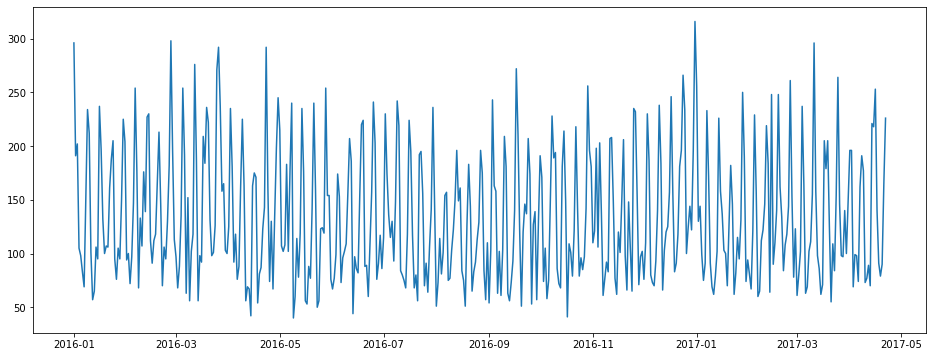

In [71]:
plt.figure(figsize = (16,6))
plt.plot(rv.total);

From this graph we can say taht there is no uptrend and downtrend data is stationary

In [72]:
rv.total.mean()

133.7928870292887

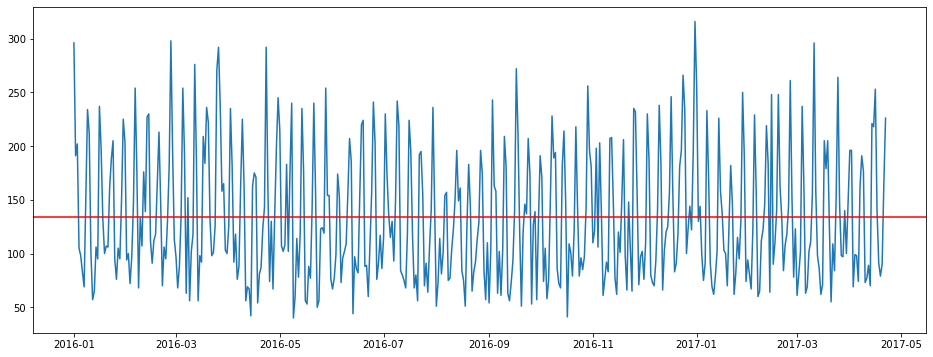

In [73]:
plt.figure(figsize = (16,6))
plt.plot(rv.total);
plt.axhline(y = rv.total.mean(),color = 'red');

In [74]:
rv[rv['holiday']==1].index # To got the index position of all the holiday

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

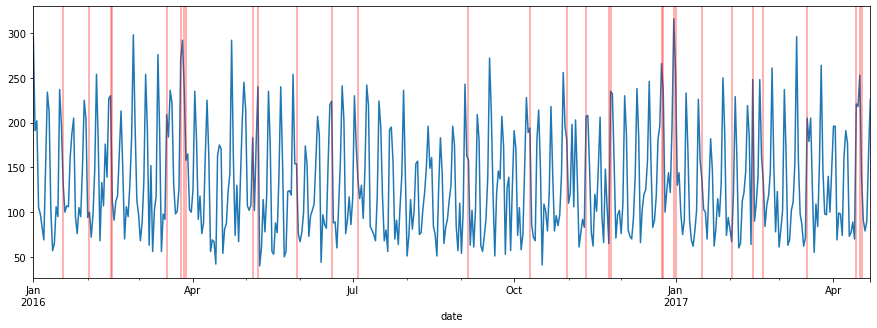

In [75]:
index_pos = rv[rv['holiday']==1].index
ax = rv['total'].plot(figsize = (15,5))
for day in index_pos :
    ax.axvline(x = day, color = 'red', alpha = 0.4)

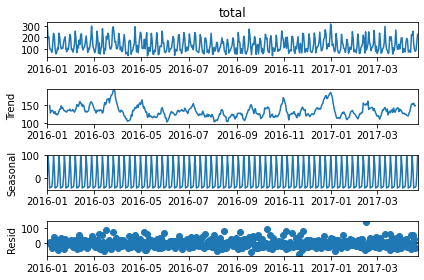

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
rv_seasonal = seasonal_decompose(rv['total'])
rv_seasonal.plot();

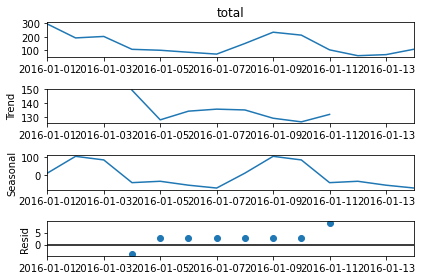

In [77]:
rv.total[0:21]
rv_seasonal = seasonal_decompose(rv.total[0:14])
rv_seasonal.plot();

In [78]:
train_rv = rv.iloc[0:450] # 1st 450 in train
test_rv = rv.iloc[450:479]# last few records in test

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [80]:
auto_arima(rv['total'],seasonal = True, m=7)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(train_rv['total'],order =(1,0,0),seasonal_order = (1,0,1,7))
result=model1.fit()  

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# Model has been created 

## prediction and explaination 

In [82]:
pred_rv = result.predict(start=450,end=477) # predicted values
pred_rv

2017-03-26    180.794665
2017-03-27     91.785338
2017-03-28     95.814024
2017-03-29     95.445426
2017-03-30     96.924925
2017-03-31    145.253810
2017-04-01    232.332692
2017-04-02    174.634838
2017-04-03     90.584633
2017-04-04     95.574631
2017-04-05     95.392802
2017-04-06     96.908446
2017-04-07    145.240513
2017-04-08    232.313809
2017-04-09    174.620828
2017-04-10     90.577387
2017-04-11     95.566996
2017-04-12     95.385183
2017-04-13     96.900707
2017-04-14    145.228914
2017-04-15    232.295257
2017-04-16    174.606883
2017-04-17     90.570154
2017-04-18     95.559365
2017-04-19     95.377566
2017-04-20     96.892969
2017-04-21    145.217317
2017-04-22    232.276706
Freq: D, Name: predicted_mean, dtype: float64

In [83]:
test_rv[test_rv['holiday']== 1].index
# gEt the holiday information for the test data

DatetimeIndex(['2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

Hence there are three holidays in your test data

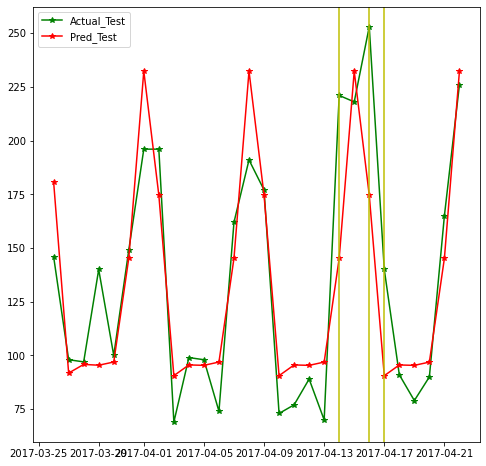

In [84]:
plt.figure(figsize = (8 , 8))
plt.plot(test_rv.total, marker = '*', color = 'g', label = 'Actual_Test')
plt.plot(pred_rv, marker = '*',color = 'r', label = 'Pred_Test')
plt.legend()
plt.axvline(x ='2017-04-14', color = 'y' )
plt.axvline(x ='2017-04-16', color = 'y' )
plt.axvline(x ='2017-04-17', color = 'y' );

By using SARIMA if you look the graph it cannot handle the holidays data there is huge differnce between actual and predicted vlaue

Therefore we have to use SARIMAX for handling the Holiday's
* Where x = exog = exogenous

In [85]:
test_rv.total

date
2017-03-26    146.0
2017-03-27     98.0
2017-03-28     97.0
2017-03-29    140.0
2017-03-30    100.0
2017-03-31    149.0
2017-04-01    196.0
2017-04-02    196.0
2017-04-03     69.0
2017-04-04     99.0
2017-04-05     98.0
2017-04-06     74.0
2017-04-07    162.0
2017-04-08    191.0
2017-04-09    177.0
2017-04-10     73.0
2017-04-11     77.0
2017-04-12     89.0
2017-04-13     70.0
2017-04-14    221.0
2017-04-15    218.0
2017-04-16    253.0
2017-04-17    140.0
2017-04-18     91.0
2017-04-19     79.0
2017-04-20     90.0
2017-04-21    165.0
2017-04-22    226.0
Name: total, dtype: float64

* for date
*                '2017-04-14'  221   145
*                '2017-04-16'  253   174
*                '2017-04-17'  140   90

In [86]:
import numpy as np
mse = np.mean(np.square(test_rv.total - pred_rv))
print('Mse value is     ',mse)
rmse = np.sqrt(mse)
print('Rmse value is    ',rmse)
# Without using the x

Mse value is      884.222267249383
Rmse value is     29.735875088004104


In [87]:
auto_arima(rv['total'],seasonal = True, m=7 ,exogenous = rv[['holiday']] )

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [88]:
type(rv['holiday'])

pandas.core.series.Series

In [89]:
type(rv[['holiday']])

pandas.core.frame.DataFrame

In [90]:
model2 = SARIMAX(train_rv['total'],order =(1,0,0),seasonal_order = (1,0,1,7), exog = train_rv[['holiday']])
results1=model2.fit()  

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [91]:
pred_rv_exog = results1.predict(start = 450, end=477,exog=test_rv[['holiday']])
pred_rv_exog

2017-03-26    176.357426
2017-03-27     81.860766
2017-03-28     93.016983
2017-03-29     95.451184
2017-03-30     92.488655
2017-03-31    138.965856
2017-04-01    228.766205
2017-04-02    169.413760
2017-04-03     80.491038
2017-04-04     92.742869
2017-04-05     95.392749
2017-04-06     92.472880
2017-04-07    138.955751
2017-04-08    228.752543
2017-04-09    169.403861
2017-04-10     80.486357
2017-04-11     92.737491
2017-04-12     95.387219
2017-04-13     92.467520
2017-04-14    207.890985
2017-04-15    228.739285
2017-04-16    238.337331
2017-04-17    149.424980
2017-04-18     92.732116
2017-04-19     95.381691
2017-04-20     92.462161
2017-04-21    138.939645
2017-04-22    228.726028
Freq: D, Name: predicted_mean, dtype: float64

* for date                      A     P     p with x
*                '2017-04-14'  221   145     207
*                '2017-04-16'  253   174     238
*                '2017-04-17'  140   90      149

now finding the mse and rmse

In [92]:
# err_with_exog = test_rv.total - pred_rv_exog
# err_with_exog 

In [93]:
import numpy as np
mse = np.mean(np.square(test_rv.total - pred_rv_exog))
print('Mse value is     ',mse)
rmse = np.sqrt(mse)
print('Rmse value is    ',rmse)
# With using the x

Mse value is      359.1999537268299
Rmse value is     18.952571164009118


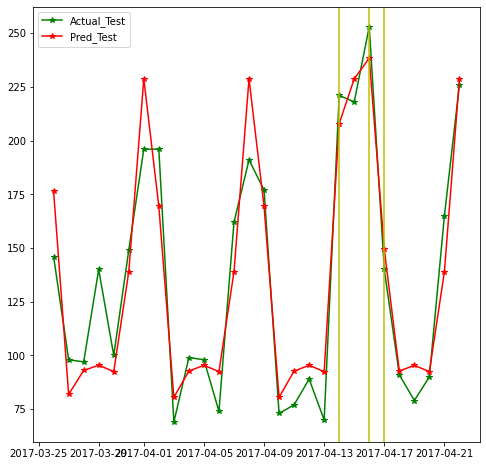

In [94]:
plt.figure(figsize = (8 , 8))
plt.plot(test_rv.total, marker = '*', color = 'g', label = 'Actual_Test')
plt.plot(pred_rv_exog, marker = '*',color = 'r', label = 'Pred_Test')
plt.legend()
plt.axvline(x ='2017-04-14', color = 'y' )
plt.axvline(x ='2017-04-16', color = 'y' )
plt.axvline(x ='2017-04-17', color = 'y' );

In [96]:
df = pd.DataFrame({'BeforeX':pred_rv , 'afterX':pred_rv_exog , 'Actual':test_rv.total})

In [97]:
df

,BeforeX,afterX,Actual
2017-03-26,180.794665,176.357426,146.0
2017-03-27,91.785338,81.860766,98.0
2017-03-28,95.814024,93.016983,97.0
2017-03-29,95.445426,95.451184,140.0
2017-03-30,96.924925,92.488655,100.0
2017-03-31,145.253810,138.965856,149.0
2017-04-01,232.332692,228.766205,196.0
2017-04-02,174.634838,169.413760,196.0
2017-04-03,90.584633,80.491038,69.0
2017-04-04,95.574631,92.742869,99.0
